<a href="https://colab.research.google.com/github/AnitaTasnim/fish_disease_paper_work/blob/main/Understanding_over_squashing_and_bottlenecks_on_graphs_via_curvature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import library

In [ ]:
#https://deeprobust.readthedocs.io/en/latest/notes/installation.html

In [ ]:
!git clone https://github.com/DSE-MSU/DeepRobust.git
%cd DeepRobust
!python setup.py install

Cloning into 'DeepRobust'...
remote: Enumerating objects: 5822, done.
remote: Counting objects: 100% (1534/1534), done.
remote: Compressing objects: 100% (636/636), done.
remote: Total 5822 (delta 961), reused 1455 (delta 890), pack-reused 4288
Receiving objects: 100% (5822/5822), 12.08 MiB | 20.48 MiB/s, done.
Resolving deltas: 100% (3824/3824), done.
/content/DeepRobust
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/p

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=b35e1a33afbc630f5e60aaa3c04bb25d9d631ed51a5209b563af0437e768cc39
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric


In [ ]:
#!pip install torch-sparse
#!pip install torch-scatter
#it takes so long , almost 1 hour

In [ ]:
'''!pip install torch-geometric \
  torch-sparse \
  torch-scatter \
  torch-cluster \
  -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html''' #also take so loooooooooooooooong

'!pip install torch-geometric   torch-sparse   torch-scatter   torch-cluster   -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html'

In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


In [ ]:
import torch

!echo https://data.pyg.org/whl/torch-{torch.__version__}.html

https://data.pyg.org/whl/torch-2.0.1+cu118.html


In [ ]:
!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Found existing installation: torch-geometric 2.3.1
Uninstalling torch-geometric-2.3.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torch_geometric-2.3.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch_geometric/*
Proceed (Y/n)? y
  Successfully uninstalled torch-geometric-2.3.1
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 38.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.4 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-letwupvt
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-letwupvt
  Resolved https://github.com/

In [ ]:
import numpy as np

In [ ]:
from deeprobust.graph.defense import GCN

In [ ]:
import random

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

#using deeprobust load cora dataset

In [ ]:
from deeprobust.graph.data import Dataset
#laoding cora dataset
data = Dataset(root = '/tmp/', name = 'cora', seed = 15) # root directory where the dataset should be saved.
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test

Loading cora dataset...
Done!
Selecting 1 largest connected components


In [ ]:
data

cora(adj_shape=(2485, 2485), feature_shape=(2485, 1433))

In [ ]:
adj, features, labels = data.adj, data.features, data.labels

In [ ]:
adj

<2485x2485 sparse matrix of type '<class 'numpy.float32'>'
	with 10138 stored elements in Compressed Sparse Row format>

In [ ]:
print(idx_train)

[1385  381  641 1054 1539 1358  591 2299   88  944 1291 1485 1129 2362
 2116  622    4 1468  382 1819 1090 2096 1839 1610  741  634  452 1081
 1606   19  403  704 1017 2336  135 1115 1767 1256  867 1862 1602 1397
  107 1711  338  894 1408 2027 1367 1943 1414 2160 2187 1265  816 2137
  695 1989 1006 1535  145 2146 1429 1762  220 2420  687 1948 1639  424
  389  437  412 2260  590  442 1515  729 1580 1658  839  734  628 1298
  399  965 1724  121 2481 1511 1975  213 2347  945 2141 1823 2313 1967
 2331 1079 2174 1797 1623 1150 1637  518  224   43  366 1808 1516 2124
  129 1557 1879 2332 2082  310 1738 1833  610 1076  959   39  980 1946
  717 1525  172  206  740 1775 2020 1533 2381 1713  913  474 2375 1916
 2237 2258 1792 2262  602 1354 1529 1573  125  390  891 1236 2044  649
 1687 1203 1205 1404  819 2039 2314 1643  947  216 1630  369 2412  763
  675  973 1668  340  911 1593 2083 2429  761 1332  964  477 2478  765
 1266  699 1047  471  528  851  333  536  575 2250 1609 1702  940  805
   29 

In [ ]:
len(idx_train)

247

In [ ]:
len(idx_val)

249

In [ ]:
len(idx_test)

1988

In [ ]:
idx_unlabeled = np.union1d(idx_val, idx_test)

print(idx_unlabeled)
print(len(idx_unlabeled))

[   0    1    2 ... 2482 2483 2484]
2237


In [ ]:
node_list = random.sample(list(idx_unlabeled),10)

In [ ]:
node_list  #target nodes

[100, 1923, 843, 2013, 1933, 436, 1476, 1882, 372, 1777]

In [ ]:
adj[0]

<1x2485 sparse matrix of type '<class 'numpy.float32'>'
	with 5 stored elements in Compressed Sparse Row format>

In [ ]:
adj

<2485x2485 sparse matrix of type '<class 'numpy.float32'>'
	with 10138 stored elements in Compressed Sparse Row format>

In [ ]:
features

<2485x1433 sparse matrix of type '<class 'numpy.float32'>'
	with 45487 stored elements in Compressed Sparse Row format>

In [ ]:
labels

array([5, 2, 0, ..., 2, 2, 2], dtype=int8)

The code you provided is related to loading data for a graph-based machine learning or network analysis task. Let's break down the components:

1. `adj` (Adjacency Matrix):
   - `adj` is a sparse matrix of shape 2485x2485.
   - It represents the adjacency matrix of a graph with 2485 nodes (or vertices).
   - In a graph, the adjacency matrix indicates which nodes are connected to each other. If node i is connected to node j, then `adj[i, j]` will have a non-zero value (typically 1, indicating an edge), otherwise, it will be zero.
   - The format mentioned, "Compressed Sparse Row format," is a memory-efficient way to store sparse matrices by only storing non-zero elements and their positions.

2. `features`:
   - `features` is a sparse matrix of shape 2485x1433.
   - It is typically used to represent node features or attributes in a graph.
   - Each row corresponds to a node in the graph (2485 nodes in this case), and each column represents a feature or attribute associated with that node.
   - The sparse matrix format is used because not every node may have a value for every feature, leading to many zero entries.
   - This format saves memory by only storing non-zero elements and their positions.

3. `labels`:
   - `labels` is an array of length 2485.
   - It represents the class labels associated with each node in the graph.
   - In this specific example, there are 2485 nodes, and each node is assigned a class label. The labels can be integers or categorical values that indicate the category or class to which each node belongs.

In summary, these data structures are common in graph-based machine learning tasks, where you have a graph represented by an adjacency matrix, features associated with each node, and labels indicating the class or category of each node. Using sparse matrix representations for `adj` and `features` is memory-efficient, especially when dealing with large graphs where most entries are zero or missing. These representations allow you to work with sparse data effectively and efficiently.

In [ ]:
features.shape

(2485, 1433)

In [ ]:
adj.shape

(2485, 2485)

adj.nnz represents the number of edges in the graph (the count of non-zero entries in the adjacency matrix).
Each non-zero entry in the adjacency matrix represents an edge between two nodes in the graph.

In [ ]:
adj.nnz

10138

In [ ]:
adj.nnz/2

5069.0

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Calculate the number of edges (edges are non-zero entries in the adjacency matrix)
num_edges = adj.nnz // 2  # Divide by 2 to account for symmetric adjacency matrix
print(f"Number of Edges: {num_edges}")



Number of Edges: 5069


In [ ]:
# Calculate degrees of each node (sum of row values in the adjacency matrix)
degrees = np.array(adj.sum(axis=1)).flatten()
print("Degrees of Each Node:")
for i, degree in enumerate(degrees):
    print(f"Node {i}: Degree {degree}")

# Store degrees in an array for further use
degrees = degrees.tolist()  # Convert the NumPy array to a Python list

# Access the degree of a specific node (e.g., node 400)
node_id = 400
print(f"Degree of Node {node_id}: {degrees[node_id]}")


Degrees of Each Node:
Node 0: Degree 5.0
Node 1: Degree 4.0
Node 2: Degree 1.0
Node 3: Degree 3.0
Node 4: Degree 3.0
Node 5: Degree 5.0
Node 6: Degree 3.0
Node 7: Degree 1.0
Node 8: Degree 5.0
Node 9: Degree 2.0
Node 10: Degree 3.0
Node 11: Degree 21.0
Node 12: Degree 1.0
Node 13: Degree 15.0
Node 14: Degree 6.0
Node 15: Degree 11.0
Node 16: Degree 6.0
Node 17: Degree 1.0
Node 18: Degree 2.0
Node 19: Degree 3.0
Node 20: Degree 5.0
Node 21: Degree 2.0
Node 22: Degree 2.0
Node 23: Degree 3.0
Node 24: Degree 2.0
Node 25: Degree 2.0
Node 26: Degree 5.0
Node 27: Degree 4.0
Node 28: Degree 2.0
Node 29: Degree 6.0
Node 30: Degree 5.0
Node 31: Degree 11.0
Node 32: Degree 3.0
Node 33: Degree 3.0
Node 34: Degree 3.0
Node 35: Degree 3.0
Node 36: Degree 5.0
Node 37: Degree 3.0
Node 38: Degree 8.0
Node 39: Degree 4.0
Node 40: Degree 4.0
Node 41: Degree 4.0
Node 42: Degree 11.0
Node 43: Degree 7.0
Node 44: Degree 4.0
Node 45: Degree 5.0
Node 46: Degree 2.0
Node 47: Degree 1.0
Node 48: Degree 1.0
Nod

 Calculate degrees of each node (sum of row values in the adjacency matrix)
degrees = np.array(adj.sum(axis=1)).flatten()

------------------------------------------------------------

The adjacency matrix (`adj` matrix) is a fundamental representation of a graph in graph theory and network analysis. It encodes information about how nodes in a graph are connected to each other. Each entry in the matrix represents a connection (edge) between two nodes. I'll explain what the adjacency matrix holds and how to calculate degrees using an example.

Let's consider a simple undirected graph with three nodes (A, B, and C) and three edges (connections):

Graph:
- Node A is connected to Node B.
- Node B is connected to Node A and Node C.
- Node C is connected to Node B.

The adjacency matrix for this graph would look like this:

```
   A  B  C
A  0  1  0
B  1  0  1
C  0  1  0
```

In the adjacency matrix:
- Rows and columns correspond to nodes in the graph (A, B, C).
- The value at row `i` and column `j` (e.g., `adj[A, B]`) represents whether there is a connection (edge) between node `i` and node `j`.
  - If there is a connection, the value is typically 1 or some non-zero value.
  - If there is no connection, the value is 0.

Now, let's calculate the degrees of each node in this graph using the adjacency matrix:

1. **Degree of Node A:**
   - To calculate the degree of Node A, we sum the values in the first row of the adjacency matrix.
   - Degree of A = Sum of row A = 0 + 1 + 0 = 1

2. **Degree of Node B:**
   - To calculate the degree of Node B, we sum the values in the second row of the adjacency matrix.
   - Degree of B = Sum of row B = 1 + 0 + 1 = 2

3. **Degree of Node C:**
   - To calculate the degree of Node C, we sum the values in the third row of the adjacency matrix.
   - Degree of C = Sum of row C = 0 + 1 + 0 = 1

So, in this example:
- Node A has a degree of 1.
- Node B has a degree of 2.
- Node C has a degree of 1.

In summary, the adjacency matrix encodes information about which nodes are connected to each other in a graph, and you can calculate the degree of each node by summing the values in the corresponding row of the adjacency matrix. The degree of a node represents the number of edges connected to that node.

In [ ]:
# Print features per node
print("\nFeatures per Node:")
for i in range(features.shape[0]):
    print(f"Node {i}: {features[i].toarray().flatten()}")



Features per Node:
Node 0: [0. 0. 0. ... 0. 0. 0.]
Node 1: [0. 0. 0. ... 0. 0. 0.]
Node 2: [0. 0. 0. ... 0. 0. 0.]
Node 3: [0. 0. 0. ... 0. 0. 0.]
Node 4: [0. 0. 0. ... 0. 0. 0.]
Node 5: [1. 0. 0. ... 0. 0. 0.]
Node 6: [0. 0. 0. ... 0. 0. 0.]
Node 7: [0. 0. 0. ... 0. 0. 0.]
Node 8: [0. 0. 0. ... 0. 0. 0.]
Node 9: [0. 0. 0. ... 0. 0. 0.]
Node 10: [0. 0. 0. ... 0. 0. 0.]
Node 11: [0. 0. 0. ... 0. 0. 0.]
Node 12: [0. 0. 0. ... 0. 0. 0.]
Node 13: [0. 0. 0. ... 0. 0. 0.]
Node 14: [0. 0. 0. ... 0. 0. 0.]
Node 15: [0. 0. 0. ... 0. 0. 0.]
Node 16: [0. 0. 0. ... 0. 0. 0.]
Node 17: [0. 0. 0. ... 0. 0. 0.]
Node 18: [0. 0. 0. ... 0. 0. 0.]
Node 19: [0. 0. 0. ... 0. 0. 0.]
Node 20: [0. 0. 0. ... 0. 0. 0.]
Node 21: [0. 0. 0. ... 0. 0. 0.]
Node 22: [0. 0. 0. ... 0. 0. 0.]
Node 23: [0. 1. 0. ... 0. 0. 0.]
Node 24: [0. 0. 0. ... 0. 0. 0.]
Node 25: [0. 0. 0. ... 0. 0. 0.]
Node 26: [0. 0. 0. ... 0. 0. 0.]
Node 27: [0. 0. 0. ... 0. 0. 0.]
Node 28: [0. 0. 0. ... 0. 0. 0.]
Node 29: [0. 0. 0. ... 0. 0. 0.]


In [ ]:

# Print the adjacency matrix (limited to a small size for visualization)
print("\nAdjacency Matrix (Sample):")
print(adj[:10, :10].toarray())  # Printing a sample of the adjacency matrix


Adjacency Matrix (Sample):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
data

cora(adj_shape=(2485, 2485), feature_shape=(2485, 1433))

In [ ]:
import numpy as np
from scipy.sparse import find

# Find non-zero entries in the adjacency matrix
row_indices, col_indices, _ = find(adj)

# Create edge_index as a NumPy array of shape (2, num_edges)
edge_index = np.vstack((row_indices, col_indices))

# Transpose edge_index to make it of shape (2, num_edges) where each column represents an edge
edge_index = edge_index.T

# Print the edge_index
print("Edge Indices:")
print(edge_index)


Edge Indices:
[[   0 1084]
 [   0 1104]
 [   0 1288]
 ...
 [2484 1184]
 [2484 1255]
 [2484 1894]]


In [ ]:
edge_index

array([[   0, 1084],
       [   0, 1104],
       [   0, 1288],
       ...,
       [2484, 1184],
       [2484, 1255],
       [2484, 1894]], dtype=int32)

##torch_geomatric format

In [ ]:
import torch
from torch_geometric.data import Data

# Assuming you already have the following:
# adj: Sparse adjacency matrix (shape: [num_nodes, num_nodes])
# features: Sparse feature matrix (shape: [num_nodes, num_features])
# labels: Node labels (shape: [num_nodes])

# Convert sparse matrices to PyTorch tensors
adj = torch.tensor(adj.toarray())
features = torch.tensor(features.toarray())
labels = torch.tensor(labels)

# Define edge_index based on the adjacency matrix
edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)

# Create a Data object
data = Data(x=features, edge_index=edge_index, y=labels)

# Print the converted Data object
print(data)


Data(x=[2485, 1433], edge_index=[10138, 2], y=[2485])


<ipython-input-69-3c5007524b58>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)


In [ ]:
data

Data(x=[2485, 1433], edge_index=[10138, 2], y=[2485])

#visualize this **graph**

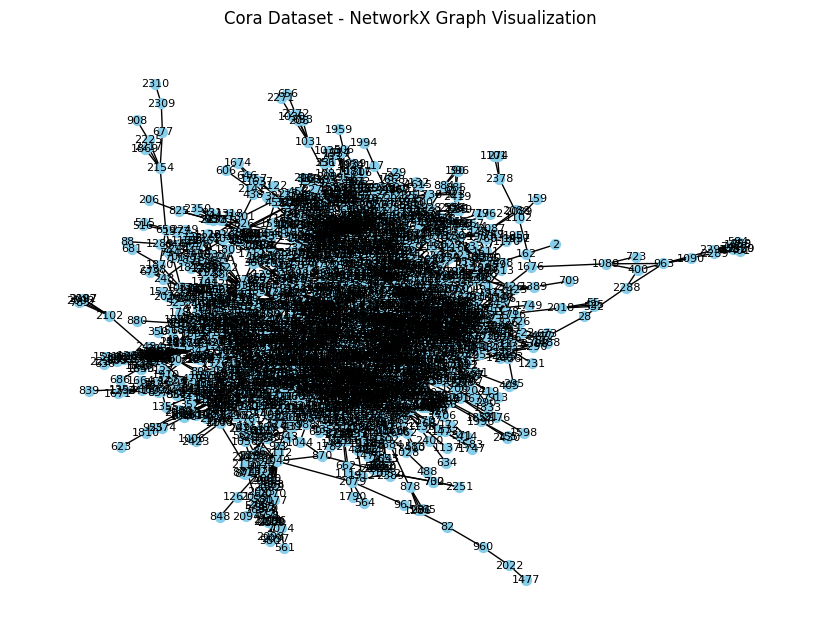

In [ ]:


# Create a NetworkX graph from the adjacency matrix
G = nx.Graph(adj)

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Layout algorithm (spring_layout in this case)
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, font_color='black')
plt.title("Cora Dataset - NetworkX Graph Visualization")
plt.show()


In [ ]:
# Create a NetworkX DiGraph (or Graph) and add edges
#G = nx.DiGraph()  # Use DiGraph for directed, or nx.Graph() for undirected
#G.add_edge(1288, 2218)

# Check if the edge exists before removal
if G.has_edge(1288, 2218):
    G.remove_edge(1288, 2218)
else:
    print("Edge (1288, 2218) does not exist in the graph.")

Edge (1288, 2218) does not exist in the graph.


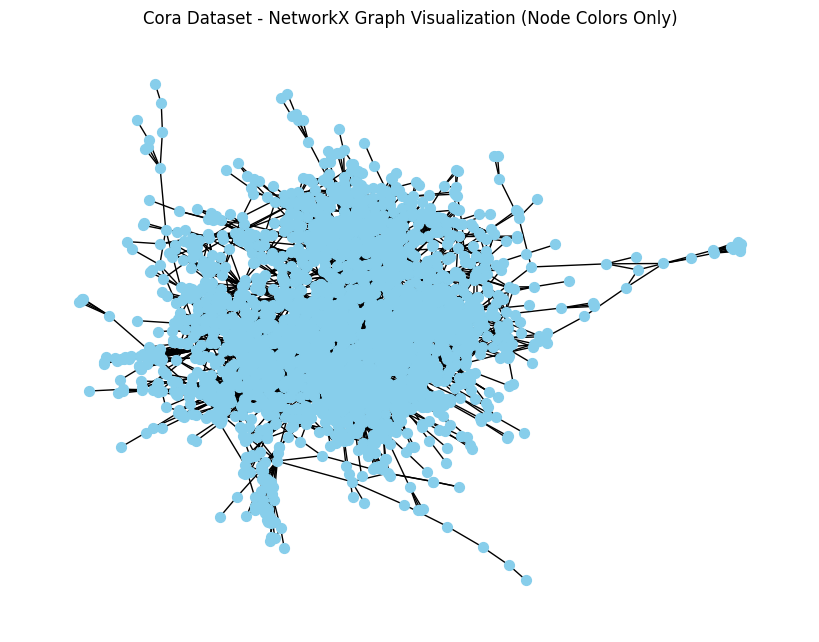

In [ ]:


# Create a NetworkX graph from the adjacency matrix
G = nx.Graph(adj)

# Visualize the graph with only node colors
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Layout algorithm (spring_layout in this case)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='skyblue')
plt.title("Cora Dataset - NetworkX Graph Visualization (Node Colors Only)")
plt.show()


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


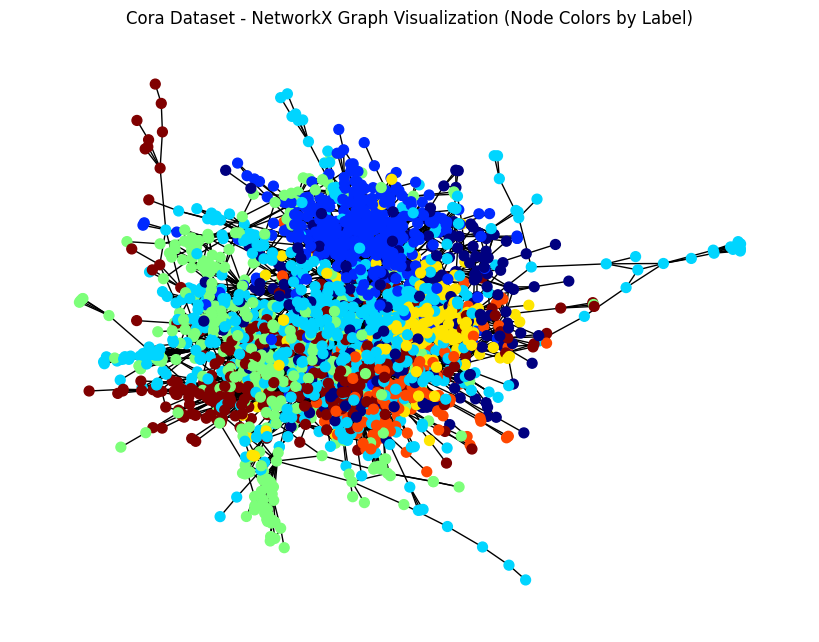

In [ ]:


# Create a NetworkX graph from the adjacency matrix
G = nx.Graph(adj)

# Create a color mapping for each unique label
unique_labels = np.unique(labels)
label_colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))  # Using a colormap for colors

# Assign a color to each node based on its label
node_colors = [label_colors[np.where(unique_labels == label)[0][0]] for label in labels]

# Visualize the graph with nodes colored according to their labels
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Layout algorithm (spring_layout in this case)
nx.draw(G, pos, with_labels=False, node_size=50, node_color=node_colors, cmap=plt.cm.jet)
plt.title("Cora Dataset - NetworkX Graph Visualization (Node Colors by Label)")
plt.show()


#calculate balanced forman ricci curvature

In [ ]:
def softmax(a, tau=1):
    exp_a = np.exp(a * tau)
    return exp_a / exp_a.sum()

In [ ]:
!pip install numba numpy torch torch-geometric networkx


In [ ]:
import math
from numba import cuda
import numpy as np
import torch
from torch_geometric.utils import (
    to_networkx,
    from_networkx,
    to_dense_adj,
    remove_self_loops,
    to_undirected,
)

In [ ]:
@cuda.jit(
    "void(float32[:,:], float32[:,:], float32[:], float32[:], int32, float32[:,:])"
)

SyntaxError: ignored

In [ ]:



@cuda.jit(
    "void(float32[:,:], float32[:,:], float32[:], float32[:], int32, float32[:,:])"
)
def _balanced_forman_curvature(A, A2, d_in, d_out, N, C):
    i, j = cuda.grid(2)

    if (i < N) and (j < N):
        if A[i, j] == 0:
            C[i, j] = 0
            return

        if d_in[i] > d_out[j]:
            d_max = d_in[i]
            d_min = d_out[j]
        else:
            d_max = d_out[j]
            d_min = d_in[i]

        if d_max * d_min == 0:
            C[i, j] = 0
            return

        sharp_ij = 0
        lambda_ij = 0
        for k in range(N):
            TMP = A[k, j] * (A2[i, k] - A[i, k]) * A[i, j]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

            TMP = A[i, k] * (A2[k, j] - A[k, j]) * A[i, j]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

        C[i, j] = (
            (2 / d_max) + (2 / d_min) - 2 + (2 / d_max + 1 / d_min) * A2[i, j] * A[i, j]
        )
        if lambda_ij > 0:
            C[i, j] += sharp_ij / (d_max * lambda_ij)


def balanced_forman_curvature(A, C=None):
    N = A.shape[0]
    A2 = torch.matmul(A, A)
    d_in = A.sum(axis=0)
    d_out = A.sum(axis=1)
    if C is None:
        C = torch.zeros(N, N).cuda()

    threadsperblock = (16, 16)
    blockspergrid_x = math.ceil(N / threadsperblock[0])
    blockspergrid_y = math.ceil(N / threadsperblock[1])
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    _balanced_forman_curvature[blockspergrid, threadsperblock](A, A2, d_in, d_out, N, C)
    return C


@cuda.jit(
    "void(float32[:,:], float32[:,:], float32, float32, int32, float32[:,:], int32, int32, int32[:], int32[:], int32, int32)"
)
def _balanced_forman_post_delta(
    A, A2, d_in_x, d_out_y, N, D, x, y, i_neighbors, j_neighbors, dim_i, dim_j
):
    I, J = cuda.grid(2)

    if (I < dim_i) and (J < dim_j):
        i = i_neighbors[I]
        j = j_neighbors[J]

        if (i == j) or (A[i, j] != 0):
            D[I, J] = -1000
            return

        # Difference in degree terms
        if j == x:
            d_in_x += 1
        elif i == y:
            d_out_y += 1

        if d_in_x * d_out_y == 0:
            D[I, J] = 0
            return

        if d_in_x > d_out_y:
            d_max = d_in_x
            d_min = d_out_y
        else:
            d_max = d_out_y
            d_min = d_in_x

        # Difference in triangles term
        A2_x_y = A2[x, y]
        if (x == i) and (A[j, y] != 0):
            A2_x_y += A[j, y]
        elif (y == j) and (A[x, i] != 0):
            A2_x_y += A[x, i]

        # Difference in four-cycles term
        sharp_ij = 0
        lambda_ij = 0
        for z in range(N):
            A_z_y = A[z, y] + 0
            A_x_z = A[x, z] + 0
            A2_z_y = A2[z, y] + 0
            A2_x_z = A2[x, z] + 0

            if (z == i) and (y == j):
                A_z_y += 1
            if (x == i) and (z == j):
                A_x_z += 1
            if (z == i) and (A[j, y] != 0):
                A2_z_y += A[j, y]
            if (x == i) and (A[j, z] != 0):
                A2_x_z += A[j, z]
            if (y == j) and (A[z, i] != 0):
                A2_z_y += A[z, i]
            if (z == j) and (A[x, i] != 0):
                A2_x_z += A[x, i]

            TMP = A_z_y * (A2_x_z - A_x_z) * A[x, y]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

            TMP = A_x_z * (A2_z_y - A_z_y) * A[x, y]
            if TMP > 0:
                sharp_ij += 1
                if TMP > lambda_ij:
                    lambda_ij = TMP

        D[I, J] = (
            (2 / d_max) + (2 / d_min) - 2 + (2 / d_max + 1 / d_min) * A2_x_y * A[x, y]
        )
        if lambda_ij > 0:
            D[I, J] += sharp_ij / (d_max * lambda_ij)


def balanced_forman_post_delta(A, x, y, i_neighbors, j_neighbors, D=None):
    N = A.shape[0]
    A2 = torch.matmul(A, A)
    d_in = A[:, x].sum()
    d_out = A[y].sum()
    if D is None:
        D = torch.zeros(len(i_neighbors), len(j_neighbors)).cuda()

    threadsperblock = (16, 16)
    blockspergrid_x = math.ceil(D.shape[0] / threadsperblock[0])
    blockspergrid_y = math.ceil(D.shape[1] / threadsperblock[1])
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    _balanced_forman_post_delta[blockspergrid, threadsperblock](
        A,
        A2,
        d_in,
        d_out,
        N,
        D,
        x,
        y,
        np.array(i_neighbors),
        np.array(j_neighbors),
        D.shape[0],
        D.shape[1],
    )
    return D

In [ ]:
data.edge_index

AttributeError: ignored

#SDRF algo

In [ ]:
'''def sdrf(
    data,
    loops=10,
    remove_edges=True,
    removal_bound=0.5,
    tau=1,
    is_undirected=False,
):
    edge_index = data.edge_index
    if is_undirected:
        edge_index = to_undirected(edge_index)
    A = to_dense_adj(remove_self_loops(edge_index)[0])[0]
    N = A.shape[0]
    G = to_networkx(data)
    if is_undirected:
        G = G.to_undirected()
    A = A.cuda()
    C = torch.zeros(N, N).cuda()

    for x in range(loops):
        can_add = True
        balanced_forman_curvature(A, C=C)
        ix_min = C.argmin().item()
        x = ix_min // N
        y = ix_min % N

        if is_undirected:
            x_neighbors = list(G.neighbors(x)) + [x]
            y_neighbors = list(G.neighbors(y)) + [y]
        else:
            x_neighbors = list(G.successors(x)) + [x]
            y_neighbors = list(G.predecessors(y)) + [y]
        candidates = []
        for i in x_neighbors:
            for j in y_neighbors:
                if (i != j) and (not G.has_edge(i, j)):
                    candidates.append((i, j))

        if len(candidates):
            D = balanced_forman_post_delta(A, x, y, x_neighbors, y_neighbors)
            improvements = []
            for (i, j) in candidates:
                improvements.append(
                    (D - C[x, y])[x_neighbors.index(i), y_neighbors.index(j)].item()
                )

            k, l = candidates[
                np.random.choice(
                    range(len(candidates)), p=softmax(np.array(improvements), tau=tau)
                )
            ]
            G.add_edge(k, l)
            if is_undirected:
                A[k, l] = A[l, k] = 1
            else:
                A[k, l] = 1
        else:
            can_add = False
            if not remove_edges:
                break

        if remove_edges:
            ix_max = C.argmax().item()
            x = ix_max // N
            y = ix_max % N
            if C[x, y] > removal_bound:
                G.remove_edge(x, y)
                if is_undirected:
                    A[x, y] = A[y, x] = 0
                else:
                    A[x, y] = 0
            else:
                if can_add is False:
                    break

    return from_networkx(G)'''

'def sdrf(\n    data,\n    loops=10,\n    remove_edges=True,\n    removal_bound=0.5,\n    tau=1,\n    is_undirected=False,\n):\n    edge_index = data.edge_index\n    if is_undirected:\n        edge_index = to_undirected(edge_index)\n    A = to_dense_adj(remove_self_loops(edge_index)[0])[0]\n    N = A.shape[0]\n    G = to_networkx(data)\n    if is_undirected:\n        G = G.to_undirected()\n    A = A.cuda()\n    C = torch.zeros(N, N).cuda()\n\n    for x in range(loops):\n        can_add = True\n        balanced_forman_curvature(A, C=C)\n        ix_min = C.argmin().item()\n        x = ix_min // N\n        y = ix_min % N\n        \n        if is_undirected:\n            x_neighbors = list(G.neighbors(x)) + [x]\n            y_neighbors = list(G.neighbors(y)) + [y]\n        else:\n            x_neighbors = list(G.successors(x)) + [x]\n            y_neighbors = list(G.predecessors(y)) + [y]\n        candidates = []\n        for i in x_neighbors:\n            for j in y_neighbors:\n          

In [ ]:
import numpy as np
import torch
from torch_geometric.utils import (
    to_networkx,
    from_networkx,
    to_undirected,
    remove_self_loops,
    to_dense_adj,
)


In [ ]:
edge_index = torch.tensor(edge_index)

In [ ]:
Edge_index = to_undirected(edge_index)


In [ ]:
edge_index

tensor([[   0, 1084],
        [   0, 1104],
        [   0, 1288],
        ...,
        [2484, 1184],
        [2484, 1255],
        [2484, 1894]], dtype=torch.int32)

In [ ]:
Edge_index

tensor([[   0, 1084, 1104],
        [   0, 1104, 1084]], dtype=torch.int32)

In [ ]:
data

Data(x=[2485, 1433], edge_index=[10138, 2], y=[2485])

In [ ]:
# Example: If your edge_index is in [num_edges, 2] format, you can reshape it
data.edge_index = data.edge_index.t().contiguous()
print(data.edge_index.shape)  # Should be [2, num_edges]

torch.Size([2, 10138])


In [ ]:
data

Data(x=[2485, 1433], edge_index=[2, 10138], y=[2485])

In [ ]:
G = to_networkx(data, to_undirected=True)

In [ ]:
def sdrf(
    data,
    loops=10,
    remove_edges=True,
    removal_bound=0.5,
    tau=1,
):
    edge_index = data.edge_index
    A = to_dense_adj(remove_self_loops(edge_index)[0])[0]
    N = A.shape[0]
    G = to_networkx(data)
    A = A.cuda()
    C = torch.zeros(N, N).cuda()

    for x in range(loops):
        can_add = True
        balanced_forman_curvature(A, C=C)
        ix_min = C.argmin().item()
        x = ix_min // N
        y = ix_min % N

        x_neighbors = list(G.neighbors(x)) + [x]
        y_neighbors = list(G.neighbors(y)) + [y]

        candidates = []
        for i in x_neighbors:
            for j in y_neighbors:
                if (i != j) and (not G.has_edge(i, j)):
                    candidates.append((i, j))

        if len(candidates):
            D = balanced_forman_post_delta(A, x, y, x_neighbors, y_neighbors)
            improvements = []
            for (i, j) in candidates:
                improvements.append(
                    (D - C[x, y])[x_neighbors.index(i), y_neighbors.index(j)].item()
                )

            k, l = candidates[
                np.random.choice(
                    range(len(candidates)), p=softmax(np.array(improvements), tau=tau)
                )
            ]
            G.add_edge(k, l)
            A[k, l] = A[l, k] = 1
        else:
            can_add = False
            if not remove_edges:
                break

        if remove_edges:
            ix_max = C.argmax().item()
            x = ix_max // N
            y = ix_max % N
            if C[x, y] > removal_bound:
                # Check if the edge exists before removing it
                if G.has_edge(x, y):
                    G.remove_edge(x, y)
                    A[x, y] = A[y, x] = 0
            else:
                if can_add is False:
                    break

    return from_networkx(G)


##call SDRF

In [ ]:
# Assuming you have already loaded your Cora dataset into 'data'
resulting_graph = sdrf(data, loops=10, remove_edges=True, removal_bound=0.5, tau=1)


/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


NetworkXError: ignored

In [ ]:
import torch

def get_optimizer(name, model, lr, weight_decay=0):
    if isinstance(name, str):
        name = name.lower()
    else:
        raise Exception("Unsupported optimizer: {}".format(name))

    parameters = [
        {'params': model.non_reg_params, 'weight_decay': 0},
        {'params': model.reg_params, 'weight_decay': weight_decay}
    ]
    if name == 'sgd':
        return torch.optim.SGD(parameters, lr=lr)
    elif name == 'rmsprop':
        return torch.optim.RMSprop(parameters, lr=lr)
    elif name == 'adagrad':
        return torch.optim.Adagrad(parameters, lr=lr)
    elif name == 'adam':
        return torch.optim.Adam(parameters, lr=lr)
    elif name == 'adamax':
        return torch.optim.Adamax(parameters, lr=lr)
    else:
        raise Exception("Unsupported optimizer: {}".format(name))

In [ ]:
import torch
import torch.nn.functional as F
from torch.optim import Optimizer
from torch_geometric.data import Data

def train(model: torch.nn.Module, optimizer: Optimizer, data: Data):
    model.train()
    optimizer.zero_grad()
    logits = model(data)
    loss = F.nll_loss(logits[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def evaluate(model: torch.nn.Module, data: Data, test: bool):
    model.eval()
    with torch.no_grad():
        logits = model(data)
    eval_dict = {}
    keys = ['val', 'test'] if test else ['val']
    for key in keys:
        mask = data[f'{key}_mask']
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        eval_dict[f'{key}_acc'] = acc
    return eval_dict

#apply GCN - node classification